In [2]:
from matplotlib.ticker import FormatStrFormatter
from matplotlib import ticker
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd
import csv
import os
import sys
import numpy as np
import matplotlib
import warnings
import sys

plt.rcParams['figure.dpi'] = 400 

In [3]:
parameters = {'y_offset' : 0.4,
              'x_offset' : 0.6,
              'canvas_dimension' : {'figsize':(7.0,3.5)},
              'x_title_dimension': {'size':12},
              'y_title_dimension': {'size':12},
              'z_title_dimension': {'size':12}}

labels = {'fontproperties' : fm.FontProperties(size=8),
          'rotation'       : 'vertical'}

ticks_params =          {
                        'direction'      : 'in',
                        'width'          : 1,
                        'color'          : '#A9A9A9',
                        'labelsize'      : 10
                        }

minor_ticks_params =    {
                        'which'      : 'minor',
                        'width'      :  1,
                        'color'      : '#A9A9A9',
                        'direction'  : 'in',
                        }

In [4]:
def create_csv_dict(csv_table):

    with open(csv_table, 'r') as ct:
        dataframe = pd.read_csv(ct, header=0)

    return dataframe

In [5]:
print(os.getcwd())
csv_file = '/home/leonardo/Desktop/JupyterLab_Templates/csv/kr2_elestr.csv'
csv_dict = create_csv_dict(csv_file)

/home/leonardo/Desktop/JupyterLab_Templates/bar_plots


In [6]:
csv_dict

,ddEMUT,WT,STR,ELE,OFF-OFF
0,P219A,-0.173192,0.054010,-0.227202,-0.344515
1,P219C,-0.563503,0.058057,-0.621560,-0.485792
2,P219D,-0.942519,0.160912,-1.103431,-0.362537
3,P219E,-1.204817,0.321404,-1.526221,-0.780439
4,P219F,-1.029115,0.158691,-1.187806,-0.731977
5,P219G,-0.186370,0.024768,-0.211138,-0.467613
6,P219H,-1.446408,-0.079003,-1.367405,-1.428311
7,P219I,-0.583583,0.444195,-1.027778,-0.343586
8,P219K,-1.119476,0.148048,-1.267524,-0.473104
9,P219L,-0.857805,-0.152918,-0.704887,-0.403488


In [7]:
models = list(csv_dict.iloc[:,0])

In [8]:
models

['P219A',
 'P219C',
 'P219D',
 'P219E',
 'P219F',
 'P219G',
 'P219H',
 'P219I',
 'P219K',
 'P219L',
 'P219M',
 'P219N',
 'P219Q',
 'P219R',
 'P219S',
 'P219T',
 'P219V',
 'P219W',
 'P219Y']

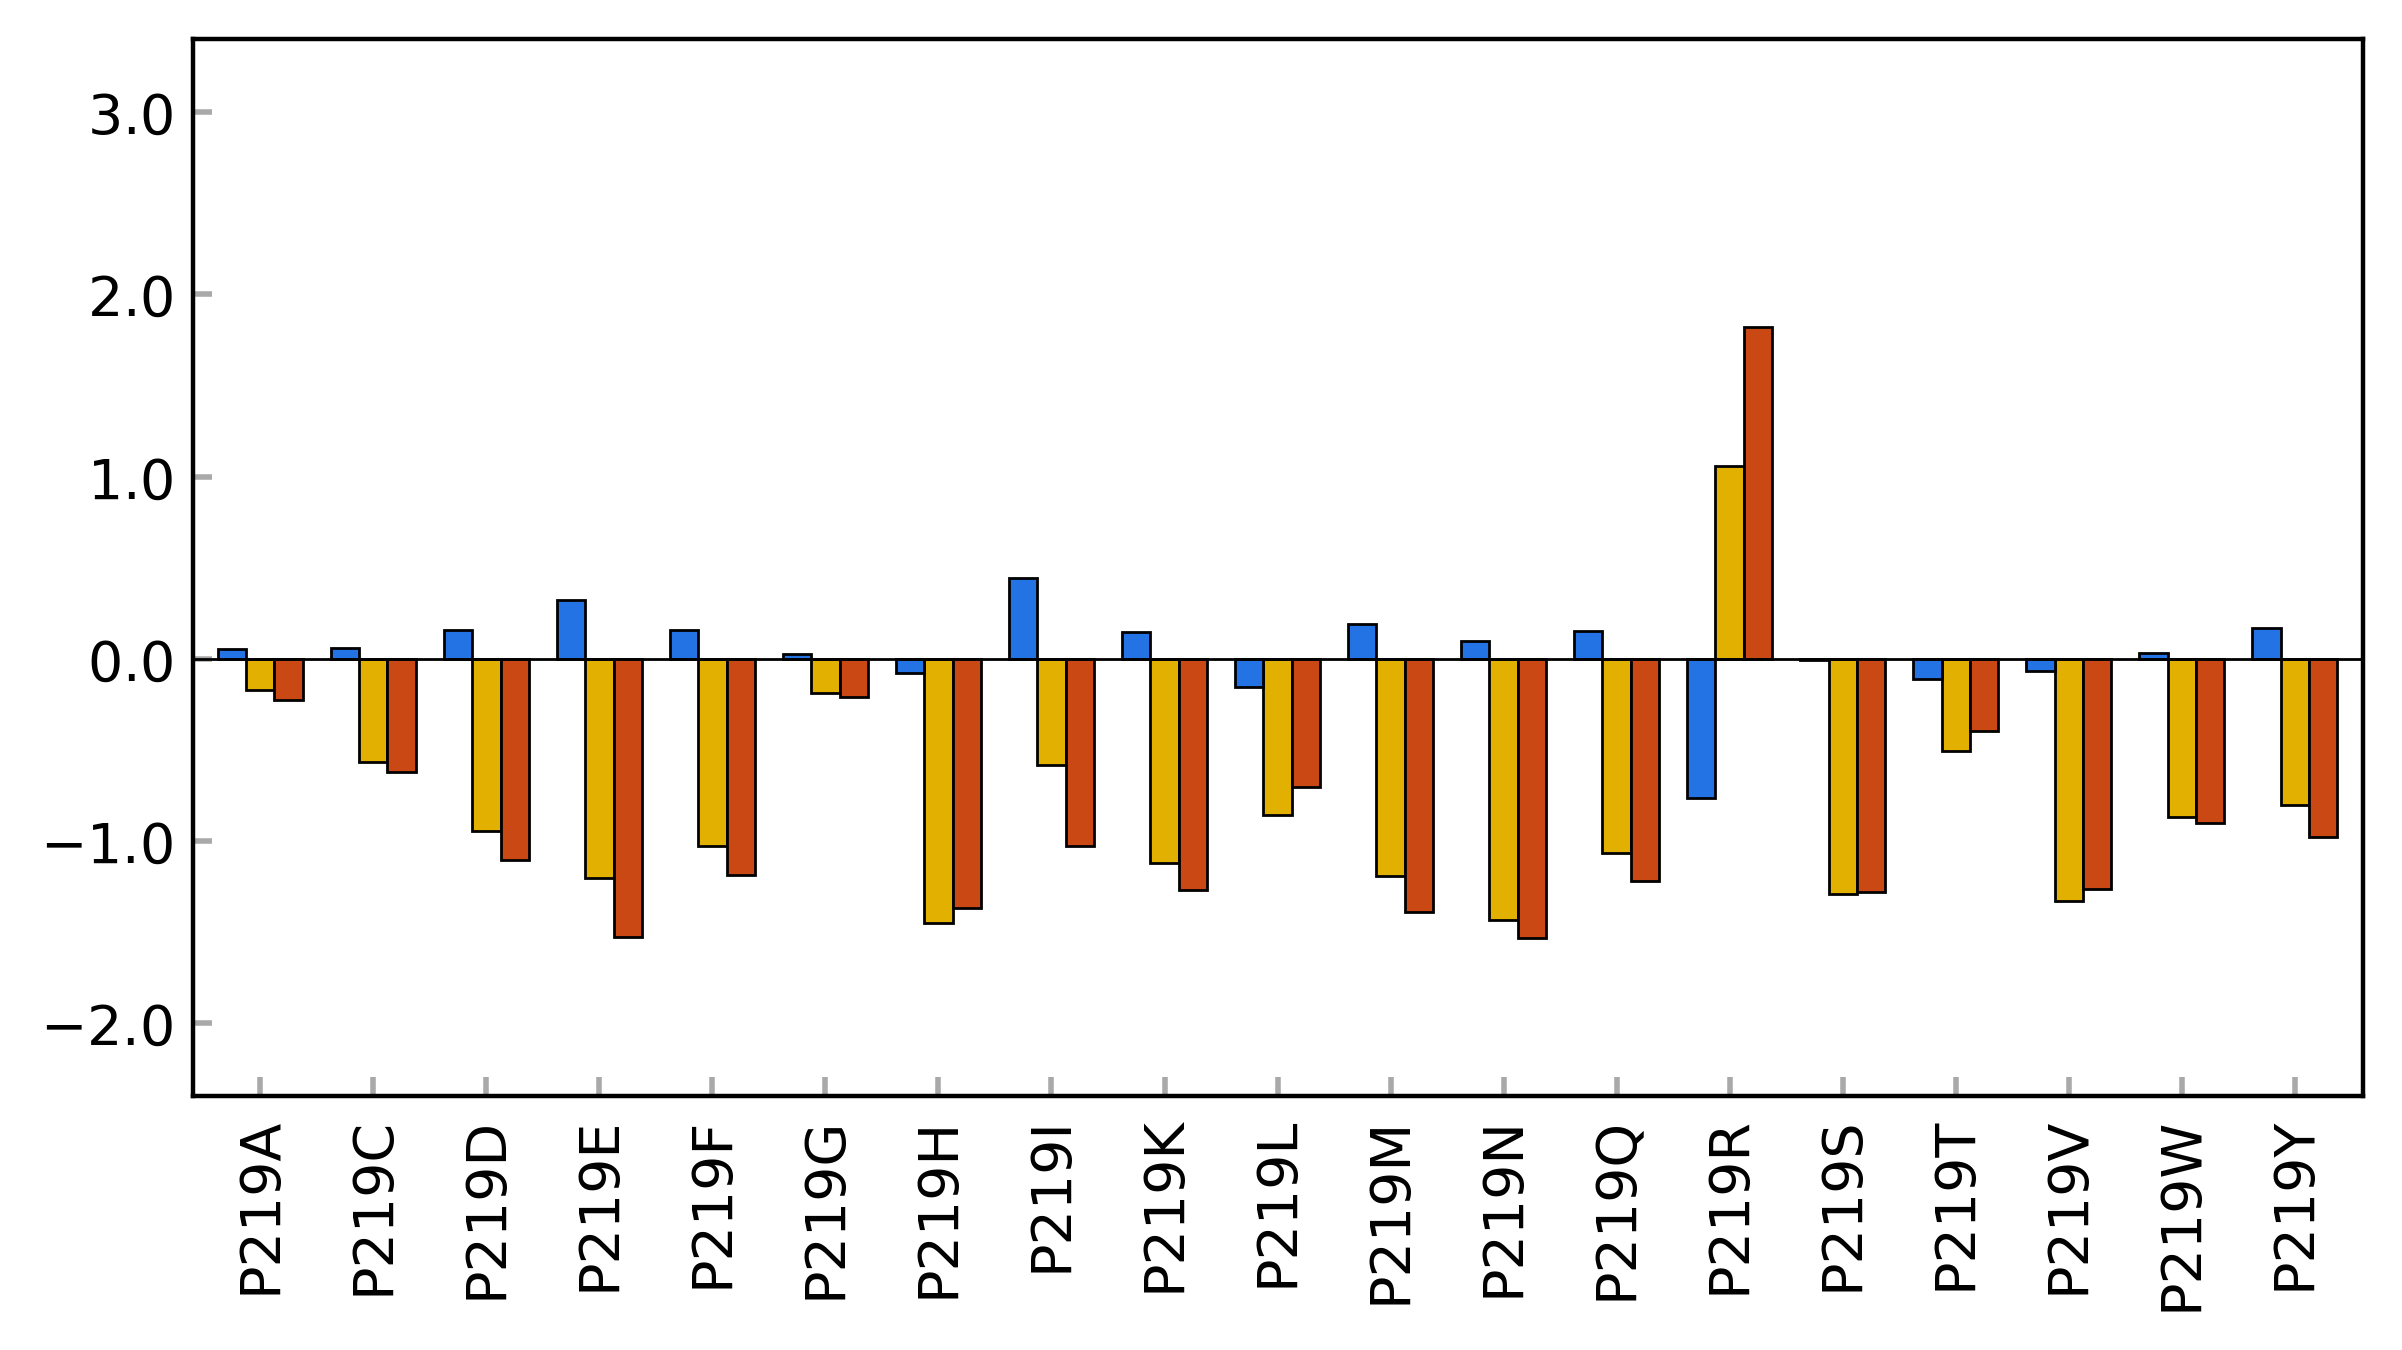

In [18]:
ylim = (-2.0, 3.0, 1.0)
xlim = (0, 18, 1)
fig, ax = plt.subplots(**parameters['canvas_dimension'])
x = np.arange(len(models))
ax.set_xticks(x)
ax.set_xticklabels(models, **labels)
ax.tick_params(axis='x', **ticks_params)
ax.tick_params(axis='y', **ticks_params)

if ylim != None:
    ax.set_yticks(np.arange(ylim[0], ylim[1]+parameters['y_offset'], ylim[2]))
    ax.set_ylim(ylim[0]-parameters['y_offset'], ylim[1]+parameters['y_offset'])

if xlim != None:
    ax.set_xticks(np.arange(xlim[0], xlim[1]+parameters['x_offset'], xlim[2]))
    ax.set_xlim(xlim[0]-parameters['x_offset'], xlim[1]+parameters['x_offset'])

ax.yaxis.set_major_formatter(FormatStrFormatter('$%.1f$'))

#a,b,c,d= csv_dict.iloc[:,1], csv_dict.iloc[:,2], csv_dict.iloc[:,3], csv_dict.iloc[:,4]
a,b,c = csv_dict.iloc[:,1], csv_dict.iloc[:,2], csv_dict.iloc[:,3]#, csv_dict.iloc[:,4]

#bar_width = 0.15
bar_width = 0.25
#ax.bar(x, b, bar_width, color="#E2B000", edgecolor="#000000", lw=0.5)
#ax.bar(x-0.15, a, bar_width, color="#2473E5",edgecolor="#000000", lw=0.5)#, yerr=err)
#ax.bar(x+0.15, c, bar_width, color="#C94814",edgecolor="#000000", lw=0.5)
#ax.bar(x+0.30, d, bar_width, color='green', edgecolor="#000000", lw=0.5)

ax.bar(x, a, bar_width, color="#E2B000", edgecolor="#000000", lw=0.5)
ax.bar(x-0.25, b, bar_width, color="#2473E5",edgecolor="#000000", lw=0.5)#, yerr=err)
ax.bar(x+0.25, c, bar_width, color="#C94814",edgecolor="#000000", lw=0.5)
ax.axhline(y=0, lw=0.5, color='#000000')
#ax.errorbar(x-0.25, y, err, capsize=1.4, capthick=0.9, ls='none', ecolor='#000000', alpha=0.7, lw=0.9, zorder=2)
plt.savefig('/home/leonardo/Desktop/bars.png', bbox_inches='tight', dpi=600, transparent=True)